In [32]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [33]:
warnings.filterwarnings('ignore', category=FutureWarning)

# Load results from JSON files
with open('../results/bilstm/bilstm_results.json', 'r') as file:
    bilstm_results = json.load(file)

with open('../results/logreg/logreg_results_2025-03-14_22-54-54.json', 'r') as file:
    logreg_results = json.load(file)

with open('../results/modernbert/results_analysis.json', 'r') as file:
    modernbert_results = json.load(file)

# Convert results into DataFrames
bilstm_df = pd.DataFrame(bilstm_results)
logreg_df = pd.DataFrame([logreg_results])  # LogReg file contains a single experiment
modernbert_df = pd.DataFrame(modernbert_results)

# Expand nested parameter and evaluation results for better analysis
bilstm_expanded = pd.json_normalize(bilstm_df["evaluation_results"])
logreg_expanded = pd.json_normalize(logreg_df["evaluation_results"])
modernbert_expanded = pd.json_normalize(modernbert_df["evaluation_results"])

# Add model names for identification
bilstm_expanded["model"] = "BiLSTM"
logreg_expanded["model"] = "Logistic Regression"
modernbert_expanded["model"] = "ModernBERT"

# Combine all results into a single DataFrame
all_results = pd.concat([bilstm_expanded, logreg_expanded, modernbert_expanded], ignore_index=True)

# Display first few rows
all_results.head()



,balanced_accuracy,macro_precision,macro_recall,macro_f1,training_history,class_metrics.0.precision,class_metrics.0.recall,class_metrics.0.f1-score,class_metrics.0.support,class_metrics.1.precision,...,eval_precision_weighted,eval_recall_weighted,eval_f1_weighted,eval_f1_class_0,eval_f1_class_1,eval_f1_class_2,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,0.452382,0.440848,0.452382,0.440884,"[{'epoch': 1, 'train_loss': 1.0999979281425476...",0.509225,0.411940,0.455446,335.0,0.518634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.525550,0.575032,0.525550,0.518822,"[{'epoch': 1, 'train_loss': 1.1000332820415497...",0.640449,0.340299,0.444444,335.0,0.507722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.562913,0.542832,0.562913,0.545051,"[{'epoch': 1, 'train_loss': 1.0997907257080077...",0.652921,0.567164,0.607029,335.0,0.583051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.653,0.6512,0.6499,0.6763,0.6442,0.6008,368.3416,2.172,0.136,3.0


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bilstm_expanded is a DataFrame with hyperparameters and metrics
# Display the first few rows of the DataFrame
bilstm_expanded.head()
# pd.set_option("display.max_colwidth", None)  # Show full column content
# print(bilstm_expanded["training_history"])


,balanced_accuracy,macro_precision,macro_recall,macro_f1,training_history,class_metrics.0.precision,class_metrics.0.recall,class_metrics.0.f1-score,class_metrics.0.support,class_metrics.1.precision,class_metrics.1.recall,class_metrics.1.f1-score,class_metrics.1.support,class_metrics.2.precision,class_metrics.2.recall,class_metrics.2.f1-score,class_metrics.2.support,model
0,0.452382,0.440848,0.452382,0.440884,"[{'epoch': 1, 'train_loss': 1.0999979281425476...",0.509225,0.411940,0.455446,335,0.518634,0.518634,0.518634,322,0.294686,0.426573,0.348571,143,BiLSTM
1,0.525550,0.575032,0.525550,0.518822,"[{'epoch': 1, 'train_loss': 1.1000332820415497...",0.640449,0.340299,0.444444,335,0.507722,0.816770,0.626190,322,0.576923,0.419580,0.485830,143,BiLSTM
2,0.562913,0.542832,0.562913,0.545051,"[{'epoch': 1, 'train_loss': 1.0997907257080077...",0.652921,0.567164,0.607029,335,0.583051,0.534161,0.557536,322,0.392523,0.587413,0.470588,143,BiLSTM


In [35]:
# Function to extract training history into a DataFrame
def extract_training_history(training_data):
    """Extracts training history and converts it into a DataFrame"""
    history_df = pd.DataFrame(training_data)
    return history_df

# Extract training histories from all BiLSTM experiments
training_histories = []
for index, row in bilstm_expanded.iterrows():
    history_df = extract_training_history(row["training_history"])
    history_df["experiment"] = f"Run {index+1}"  # Label different runs
    training_histories.append(history_df)

# Combine all training histories
all_training_df = pd.concat(training_histories, ignore_index=True)

# Display the first few rows to verify
all_training_df.head(50)

,epoch,train_loss,train_acc,val_loss,val_acc,experiment
0,1,1.099998,0.368750,1.096781,0.339653,Run 1
1,2,1.091729,0.358438,1.093631,0.378097,Run 1
2,3,1.085465,0.385313,1.090119,0.399775,Run 1
3,4,1.078060,0.433750,1.084607,0.439772,Run 1
4,5,1.069826,0.407813,1.078155,0.452382,Run 1
5,1,1.100033,0.361875,1.096460,0.375224,Run 2
6,2,1.089884,0.386562,1.092009,0.392040,Run 2
7,3,1.074669,0.400313,1.081215,0.376163,Run 2
8,4,1.060643,0.415625,1.073585,0.406184,Run 2
9,5,1.038933,0.442812,1.055775,0.452287,Run 2


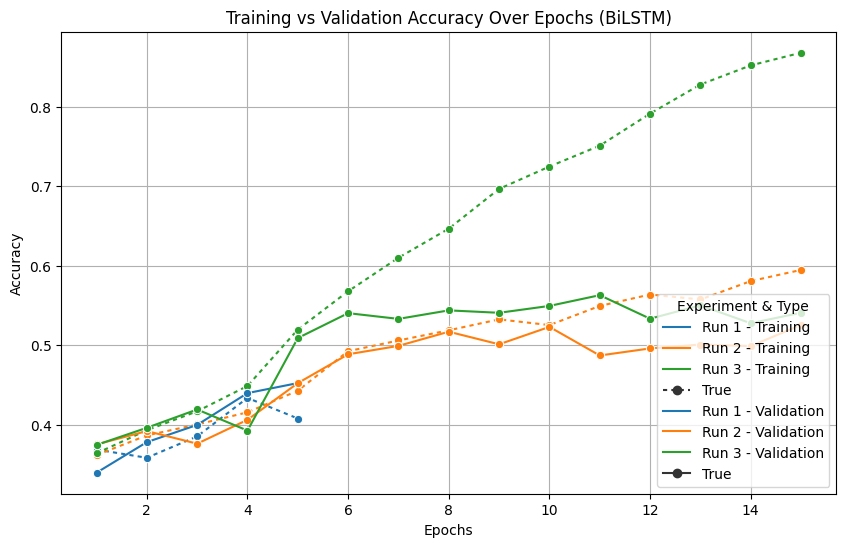

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to modify for legend purposes
plot_df = all_training_df.copy()

# Modify the "experiment" column to include "Training" and "Validation" labels
plot_df["train_label"] = plot_df["experiment"] + " - Training"
plot_df["val_label"] = plot_df["experiment"] + " - Validation"

plt.figure(figsize=(10, 6))

# Plot training accuracy for each experiment
sns.lineplot(data=plot_df, x="epoch", y="train_acc", hue="train_label", style=True, markers=True, dashes=[(2, 2)])

# Plot validation accuracy for each experiment
sns.lineplot(data=plot_df, x="epoch", y="val_acc", hue="val_label", style=True, markers=True, dashes=False)

# Customize plot
plt.title("Training vs Validation Accuracy Over Epochs (BiLSTM)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(title="Experiment & Type", loc="lower right")
plt.grid()

# Show plot
plt.show()


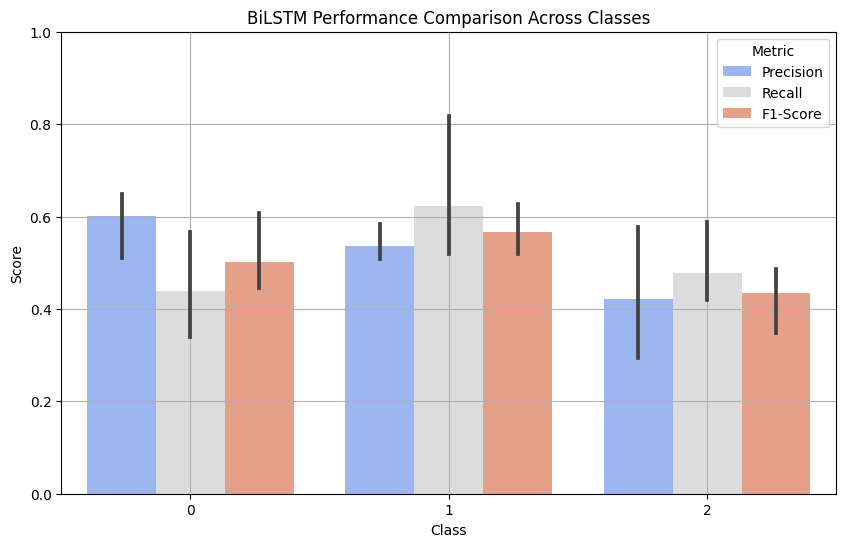

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract relevant class metrics
class_metrics_df = bilstm_expanded[[
    "class_metrics.0.precision", "class_metrics.0.recall", "class_metrics.0.f1-score", 
    "class_metrics.1.precision", "class_metrics.1.recall", "class_metrics.1.f1-score", 
    "class_metrics.2.precision", "class_metrics.2.recall", "class_metrics.2.f1-score"
]]

# Rename columns for better readability
class_metrics_df.columns = ["Class 0 Precision", "Class 0 Recall", "Class 0 F1-Score",
                            "Class 1 Precision", "Class 1 Recall", "Class 1 F1-Score",
                            "Class 2 Precision", "Class 2 Recall", "Class 2 F1-Score"]

# Convert to long format for Seaborn
class_metrics_long = class_metrics_df.melt(var_name="Metric", value_name="Score")

# Extract Class & Metric information
class_metrics_long["Class"] = class_metrics_long["Metric"].str.extract(r'Class (\d)')[0]
class_metrics_long["Metric"] = class_metrics_long["Metric"].str.extract(r'(Precision|Recall|F1-Score)')[0]

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=class_metrics_long, x="Class", y="Score", hue="Metric", palette="coolwarm")

# Customize plot
plt.title("BiLSTM Performance Comparison Across Classes")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)  # Since precision, recall, and F1-score are between 0-1
plt.legend(title="Metric")
plt.grid()

# Show plot
plt.show()


In [38]:
logreg_expanded.head()

,training.balanced_accuracy,training.macro_precision,training.macro_recall,training.macro_f1,training.class_metrics.0.precision,training.class_metrics.0.recall,training.class_metrics.0.f1-score,training.class_metrics.0.support,training.class_metrics.1.precision,training.class_metrics.1.recall,...,validation.class_metrics.0.support,validation.class_metrics.1.precision,validation.class_metrics.1.recall,validation.class_metrics.1.f1-score,validation.class_metrics.1.support,validation.class_metrics.2.precision,validation.class_metrics.2.recall,validation.class_metrics.2.f1-score,validation.class_metrics.2.support,model
0,0.788557,0.767275,0.788557,0.774889,0.820648,0.796635,0.808463,1367,0.847844,0.787284,...,335,0.638596,0.565217,0.599671,322,0.48538,0.58042,0.528662,143,Logistic Regression


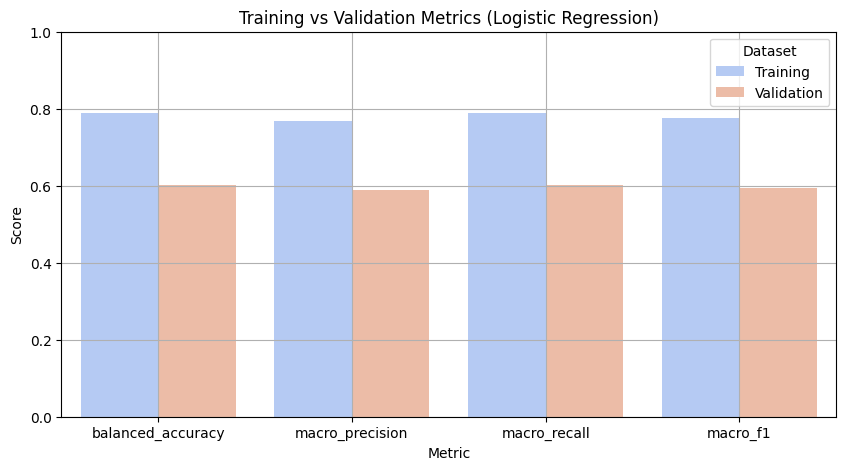

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select relevant training & validation metrics
train_metrics = logreg_expanded[[
    "training.balanced_accuracy", "training.macro_precision", "training.macro_recall", "training.macro_f1"
]].rename(columns=lambda x: x.replace("training.", ""))

val_metrics = logreg_expanded[[
    "validation.balanced_accuracy", "validation.macro_precision", "validation.macro_recall", "validation.macro_f1"
]].rename(columns=lambda x: x.replace("validation.", ""))

# Melt data for Seaborn plotting
train_metrics["Dataset"] = "Training"
val_metrics["Dataset"] = "Validation"
combined_metrics = pd.concat([train_metrics, val_metrics]).melt(id_vars=["Dataset"], var_name="Metric", value_name="Score")

# 📌 **Plot Training vs Validation Metrics**
plt.figure(figsize=(10, 5))
sns.barplot(data=combined_metrics, x="Metric", y="Score", hue="Dataset", palette="coolwarm")

plt.title("Training vs Validation Metrics (Logistic Regression)")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)  # Since values range from 0-1
plt.legend(title="Dataset")
plt.grid()

plt.show()


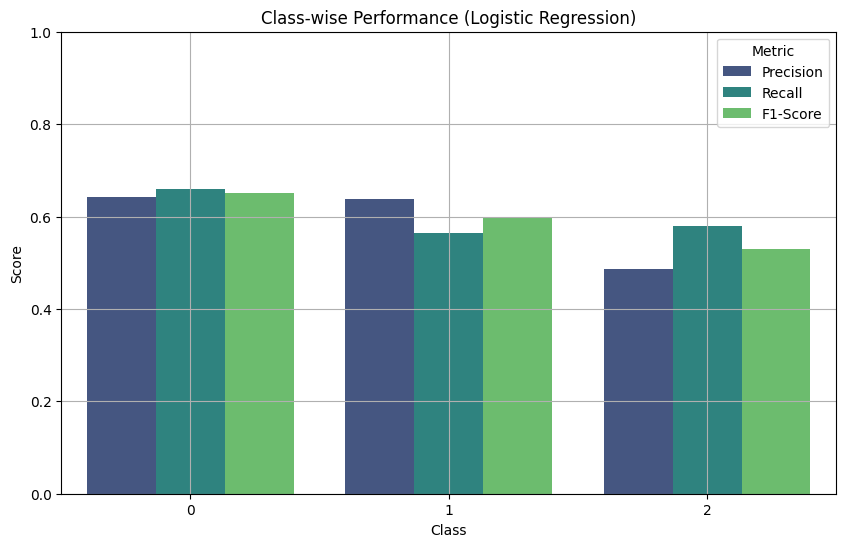

In [40]:
# Extract class-wise precision, recall, and F1-score
class_metrics = logreg_expanded[[
    "validation.class_metrics.0.precision", "validation.class_metrics.0.recall", "validation.class_metrics.0.f1-score",
    "validation.class_metrics.1.precision", "validation.class_metrics.1.recall", "validation.class_metrics.1.f1-score",
    "validation.class_metrics.2.precision", "validation.class_metrics.2.recall", "validation.class_metrics.2.f1-score"
]]

# Rename for better readability
class_metrics.columns = ["Class 0 Precision", "Class 0 Recall", "Class 0 F1-Score",
                         "Class 1 Precision", "Class 1 Recall", "Class 1 F1-Score",
                         "Class 2 Precision", "Class 2 Recall", "Class 2 F1-Score"]

# Convert to long format for plotting
class_metrics_long = class_metrics.melt(var_name="Metric", value_name="Score")

# Extract Class & Metric info
class_metrics_long["Class"] = class_metrics_long["Metric"].str.extract(r'Class (\d)')[0]
class_metrics_long["Metric"] = class_metrics_long["Metric"].str.extract(r'(Precision|Recall|F1-Score)')[0]

# 📌 **Plot Class-wise Metrics**
plt.figure(figsize=(10, 6))
sns.barplot(data=class_metrics_long, x="Class", y="Score", hue="Metric", palette="viridis")

plt.title("Class-wise Performance (Logistic Regression)")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)  # Precision, Recall, and F1-score range from 0-1
plt.legend(title="Metric")
plt.grid()

plt.show()


In [41]:
modernbert_df.head(50)

,id,parameters,evaluation_results
0,2025-03-10_13_10_17,"{'model_name': 'answerdotai/ModernBERT-large',...","{'eval_loss': 0.8141, 'eval_balanced_accuracy'..."
1,2025-03-10_16_14_07,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 0.8909, 'eval_balanced_accuracy'..."
2,2025-03-11_02_01_52,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 1.2345, 'eval_balanced_accuracy'..."
3,2025-03-11_11_10_22,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 0.9234, 'eval_balanced_accuracy'..."
4,2025-03-11_22_04_19,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 1.0845, 'eval_balanced_accuracy'..."
5,2025-03-12_08_25_48,"{'model_name': 'answerdotai/ModernBERT-large',...","{'eval_loss': 0.8243, 'eval_balanced_accuracy'..."
6,2025-03-12_13_08_54,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 0.8816, 'eval_balanced_accuracy'..."
7,2025-03-12_16_38_22,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 1.2345, 'eval_balanced_accuracy'..."
8,2025-03-12_22_55_35,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 0.8345, 'eval_balanced_accuracy'..."
9,2025-03-13_04_08_01,"{'model_name': 'answerdotai/ModernBERT-base', ...","{'eval_loss': 1.1023, 'eval_balanced_accuracy'..."


In [42]:
import pandas as pd


# Assuming `bilstm_results` is the DataFrame containing the provided data
best_bilstm = all_training_df.loc[all_training_df["val_acc"].idxmax()]  # Find best epoch

# Extract metrics and parameters
best_bilstm_metrics = {
    "Model": "BiLSTM",
    "Train Loss": best_bilstm["train_loss"],
    "Train Accuracy": best_bilstm["train_acc"],
    "Validation Loss": best_bilstm["val_loss"],
    "Validation Accuracy": best_bilstm["val_acc"],
    "Parameters": f"Run: {best_bilstm['experiment']}, Epoch: {best_bilstm['epoch']}"
}

# Convert to DataFrame
best_bilstm_df = pd.DataFrame([best_bilstm_metrics])

# If all_results does not exist, create it
try:
    all_results = pd.concat([all_results, best_bilstm_df], ignore_index=True)
except NameError:
    all_results = best_bilstm_df

# Display final results
print(all_results)


    balanced_accuracy  macro_precision  macro_recall  macro_f1  \
0            0.452382         0.440848      0.452382  0.440884   
1            0.525550         0.575032      0.525550  0.518822   
2            0.562913         0.542832      0.562913  0.545051   
3                 NaN              NaN           NaN       NaN   
4                 NaN              NaN           NaN       NaN   
5                 NaN              NaN           NaN       NaN   
6                 NaN              NaN           NaN       NaN   
7                 NaN              NaN           NaN       NaN   
8                 NaN              NaN           NaN       NaN   
9                 NaN              NaN           NaN       NaN   
10                NaN              NaN           NaN       NaN   
11                NaN              NaN           NaN       NaN   
12                NaN              NaN           NaN       NaN   
13                NaN              NaN           NaN       NaN   
14        

In [43]:
best_bilstm = all_training_df.loc[all_training_df["val_acc"].idxmax()]  # Find best epoch
best_bilstm.head()
# Extract metrics and parameters
best_bilstm_metrics = {
    "Model": "BiLSTM",
    "Train Loss": best_bilstm["train_loss"],
    "Train Accuracy": best_bilstm["train_acc"],
    "Validation Loss": best_bilstm["val_loss"],
    "Validation Accuracy": best_bilstm["val_acc"],
    "Parameters": f"Run: {best_bilstm['experiment']}, Epoch: {best_bilstm['epoch']}"
}

# Convert to DataFrame
best_bilstm_df = pd.DataFrame([best_bilstm_metrics])
best_bilstm_df.head()

,Model,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy,Parameters
0,BiLSTM,0.524676,0.750938,1.007598,0.562913,"Run: Run 3, Epoch: 11"


In [44]:
import pandas as pd


# Extract validation results
logreg_best_metrics = logreg_results['evaluation_results']['validation']

# Extract hyperparameters
logreg_params = logreg_results['parameters']

# Convert feature_weights to a readable format
feature_weights_str = f"title={logreg_params['feature_weights']['title_weight']}, article={logreg_params['feature_weights']['article_weight']}"

# Create a new row for logreg results
logreg_row = {
    "model": "Logistic Regression",
    "balanced_accuracy": logreg_best_metrics["balanced_accuracy"],
    "macro_precision": logreg_best_metrics["macro_precision"],
    "macro_recall": logreg_best_metrics["macro_recall"],
    "macro_f1": logreg_best_metrics["macro_f1"],
    "parameters": f"class_weight={logreg_params['class_weight']}, max_iter={logreg_params['max_iter']}, "
                  f"C={logreg_params['C']}, solver={logreg_params['solver']}, {feature_weights_str}"
}

# Convert to DataFrame
best_logreg = pd.DataFrame([logreg_row])
best_logreg.head()


,model,balanced_accuracy,macro_precision,macro_recall,macro_f1,parameters
0,Logistic Regression,0.601779,0.588806,0.601779,0.593097,"class_weight=balanced, max_iter=1000, C=0.1, s..."


In [45]:
# Process and reshape data
def process_json_data(data):
    result = []
    for item in data:
        entry = {}
        # Add parameters
        for key, value in item['parameters'].items():
            entry[key] = value
        
        # Add evaluation results (remove 'eval_' prefix)
        for key, value in item['evaluation_results'].items():
            new_key = key.replace('eval_', '')
            entry[new_key] = value
            
        result.append(entry)
    return pd.DataFrame(result)

modern_bert_df = process_json_data(modernbert_results)

# Convert columns to proper types
numeric_columns = ['learning_rate', 'max_length', 'batch_size', 'num_epochs', 
                  'warmup_ratio', 'weight_decay', 'balanced_accuracy', 
                  'precision_weighted', 'recall_weighted', 'f1_weighted', 
                  'f1_class_0', 'f1_class_1', 'f1_class_2', 'loss']

for col in numeric_columns:
    if col in modern_bert_df.columns:
        modern_bert_df[col] = pd.to_numeric(modern_bert_df[col])

modern_bert_df.head(50).sort_values(by='balanced_accuracy', ascending=False)

,model_name,max_length,batch_size,learning_rate,num_epochs,weight_decay,warmup_ratio,loss,balanced_accuracy,precision_weighted,recall_weighted,f1_weighted,f1_class_0,f1_class_1,f1_class_2,runtime,samples_per_second,steps_per_second,epoch,text
30,answerdotai/ModernBERT-large,128,16,0.00008,3,0.01,0.05,0.890290,0.707708,0.729506,0.72875,0.727727,0.741301,0.741840,0.664151,378.7287,2.112,0.132,3.0,NaN
11,answerdotai/ModernBERT-large,128,16,0.00005,3,0.01,0.05,1.040000,0.702300,0.725100,0.72380,0.722900,0.743900,0.731600,0.654100,313.9580,2.548,0.159,3.0,NaN
31,answerdotai/ModernBERT-base,128,16,0.00008,3,0.01,0.05,0.760300,0.694000,0.711200,0.71000,0.709200,0.714100,0.729400,0.652000,129.9415,6.157,0.385,3.0,NaN
5,answerdotai/ModernBERT-large,128,16,0.00003,3,0.01,0.05,0.824300,0.691000,0.706200,0.70500,0.704400,0.725200,0.700900,0.661700,368.5372,2.171,0.136,3.0,NaN
12,answerdotai/ModernBERT-base,128,16,0.00005,3,0.01,0.05,1.125100,0.680000,0.688500,0.68750,0.687300,0.708100,0.685000,0.643600,133.9474,5.972,0.373,3.0,NaN
28,answerdotai/ModernBERT-base,128,16,0.00008,3,0.01,0.15,0.773200,0.673200,0.692100,0.69130,0.690500,0.701600,0.699600,0.643900,114.6498,6.978,0.436,3.0,NaN
18,answerdotai/ModernBERT-base,128,16,0.00008,3,0.01,0.15,0.773200,0.673200,0.692100,0.69130,0.690500,0.701600,0.699600,0.643900,114.6498,6.978,0.436,3.0,NaN
29,answerdotai/ModernBERT-base,128,16,0.00008,3,0.01,0.10,0.913921,0.671023,0.682509,0.68250,0.682457,0.701183,0.689655,0.622378,131.8491,6.068,0.379,3.0,NaN
16,answerdotai/ModernBERT-base,128,16,0.00006,3,0.01,0.05,0.870200,0.667600,0.685400,0.68630,0.685700,0.706100,0.699700,0.606500,131.8605,6.067,0.379,3.0,NaN
20,answerdotai/ModernBERT-base,128,16,0.00008,5,0.01,0.05,1.649000,0.667200,0.677000,0.67630,0.676500,0.705500,0.674000,0.614300,101.3165,7.896,0.494,5.0,NaN


In [46]:
best_moderbert = modern_bert_df.loc[modern_bert_df['balanced_accuracy'].idxmax()].to_frame().T
best_moderbert.head()

,model_name,max_length,batch_size,learning_rate,num_epochs,weight_decay,warmup_ratio,loss,balanced_accuracy,precision_weighted,recall_weighted,f1_weighted,f1_class_0,f1_class_1,f1_class_2,runtime,samples_per_second,steps_per_second,epoch,text
30,answerdotai/ModernBERT-large,128,16,0.00008,3,0.01,0.05,0.89029,0.707708,0.729506,0.72875,0.727727,0.741301,0.74184,0.664151,378.7287,2.112,0.132,3.0,NaN
